<a href="https://colab.research.google.com/github/Nadiam75/DeepLearning_HW_2/blob/main/transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!wget -nc https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_2/main/imageNetLabels.py

--2021-12-10 17:06:45--  https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_2/main/imageNetLabels.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30786 (30K) [text/plain]
Saving to: ‘imageNetLabels.py’

imageNetLabels.py   100%[===================>]  30.06K  --.-KB/s    in 0s      

2021-12-10 17:06:45 (98.7 MB/s) - ‘imageNetLabels.py’ saved [30786/30786]



In [3]:

import tensorflow as tf  
# Display the version
print(tf.__version__)    
import  imageNetLabels
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
# from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input

from keras.callbacks import ModelCheckpoint   
import time
from sklearn.model_selection import train_test_split

2.7.0


In [4]:
dictionary = imageNetLabels.IMAGENET_CLASSES

In [5]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [6]:
# base_model_NASNetMobile = NASNetMobile(weights="imagenet")


In [7]:
# base_model_NASNetLarge = NASNetLarge(weights="imagenet")  ## (331, 331, 3) 

In [8]:
# base_model_NASNetMobile.summary() ## z

In [9]:
# i = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
# core = tf.keras.applications.MobileNet()
# x = core(x)
# model = tf.keras.Model(inputs=[i], outputs=[x])

# image = tf.image.decode_png(tf.io.read_file('file.png'))
# result = model(image)

In [21]:

def get_model_classif_nasnet():
    inputs = Input((224, 224, 3))
    xx = tf.cast(inputs, tf.float32)
    xxx = tf.keras.applications.mobilenet.preprocess_input(xx)

    base_model = NASNetMobile(include_top=False, input_shape=(224, 224, 3) )
    x = base_model(xxx)
    out3 = GlobalMaxPooling2D()(x)
    # out2 = GlobalAveragePooling2D()(x)
    # out3 = Flatten()(gmp)
    # out = Concatenate(axis=-1)([out1, out2, out3])
    out2 = Dense(1024, activation=tf.keras.activations.relu, name="3_")(out3)
    out2 = Dropout(0.5)(out2)
    out1 = Dense(512, activation=tf.keras.activations.relu, name="2_")(out2)
    out1 = Dropout(0.5)(out1)
    out = Dense(1000, activation=tf.keras.activations.softmax, name="1_")(out1)

    model = Model(inputs, out)

    for l in model.layers[:-5]:
    #print(l)
      l.trainable = False
    model.summary(  )

    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])

    return model

In [22]:
model = get_model_classif_nasnet()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_6 (TFOpLambda)      (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_6 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_6 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_max_pooling2d_6 (Glo  (None, 1056)             0   

In [ ]:
# model.fit_generator(train_generator,steps_per_epoch=5176//128,validation_data=valid_generator,validation_steps=1293//128,epochs=2)

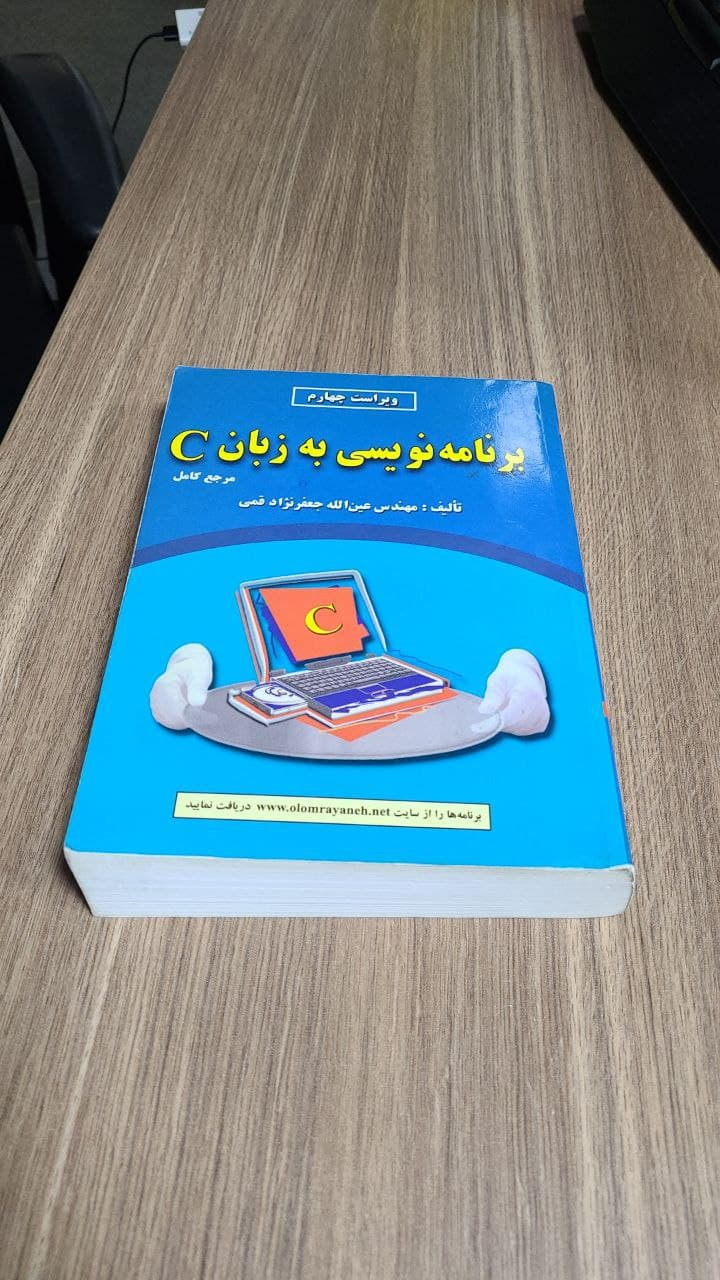

NameError: ignored

In [43]:
import cv2
img = cv2.imread('dumb.jpg')
from google.colab.patches import cv2_imshow
cv2_imshow(img)
# image.sizE
# dim = (224, 224 , 3)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 

In [34]:
indices = np.where(Y_train == 2)

In [35]:
y_train_bird = Y_train[indices]
x_train_bird = X_train[indices]

In [37]:
BS=32
EPOCHS = 100
h5_path = "transferred_model.h5"

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")



checkpoint = ModelCheckpoint(h5_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
H = model.fit_generator(aug.flow(x_train_bird, y_train_bird, batch_size=BS),
	validation_data=(X_test, X_test), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS)
# history = model.fit_generator(
#     data_gen(train, id_label_map, batch_size, augment=True),
#     validation_data=data_gen(val, id_label_map, batch_size),
#     epochs=2, verbose=1,
#     callbacks=[checkpoint],
#     steps_per_epoch=len(train) // batch_size,
#     validation_steps=len(val) // batch_size)
# batch_size=64
# history = model.fit_generator(
#     data_gen(train, id_label_map, batch_size, augment=True),
#     validation_data=data_gen(val, id_label_map, batch_size),
#     epochs=6, verbose=1,
#     callbacks=[checkpoint],
#     steps_per_epoch=len(train) // batch_size,
#     validation_steps=len(val) // batch_size)

# model.load_weights(h5_path)

NameError: ignored